In [1]:
# useful additional packages
import matplotlib.pyplot as plt
import matplotlib.axes as axes
%matplotlib inline
import numpy as np
import networkx as nx

from qiskit import Aer
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit.optimization.applications.ising import max_cut, tsp
from qiskit.aqua.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.aqua.components.optimizers import SPSA
from qiskit.aqua import aqua_globals
from qiskit.aqua import QuantumInstance
from qiskit.optimization.applications.ising.common import sample_most_likely
from qiskit.optimization.algorithms import MinimumEigenOptimizer
from qiskit.optimization.problems import QuadraticProgram

# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging
# set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

c:\users\matti\miniconda3\envs\quantum_win\lib\site-packages\qiskit\optimization\__init__.py:92: DeprecationWarning: The package qiskit.optimization is deprecated. It was moved/refactored to qiskit_optimization (pip install qiskit-optimization). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_package('optimization', 'qiskit_optimization', 'qiskit-optimization')


tulostetaan distances:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
tulostetaan distances:
[[0. 2. 2. 1.]
 [2. 0. 2. 1.]
 [2. 2. 0. 1.]
 [1. 1. 1. 0.]]
valmis
{0: array([2.8, 0.8]), 1: array([3.4, 2.8]), 2: array([1.7, 2.5]), 3: array([2.5, 2.1])}


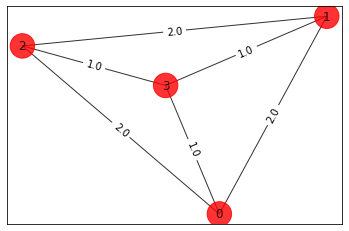

In [2]:
# Oittaan rastien koordinaatit suuunnistuskartalla 1: 10000
import math
#coordinates=np.array([[2.8, 0.8], [6.1, 1.8],[5,1]])
#print(coordinates[2,1])
coordinates=np.array([[2.8, 0.8],[3.4, 2.8],[1.7, 2.5], [2.5,2.1]])

n = len(coordinates)
distances =np.zeros((n,n))

print("tulostetaan distances:")
print(distances)

for i in range(n):
    for j in range(n):
        distances[i,j] =round(math.sqrt((coordinates[i, 0]-coordinates[j,0])**2+(coordinates[i,1]-coordinates[j,1])**2),0)

print("tulostetaan distances:")
print(distances)

print("valmis")
# Generating a graph of n nodes

num_qubits = n ** 2
ins = tsp.TspData("suunnistus",n, coordinates, distances)
#print('distance2\n', ins.w)

#print('ins.coord:\n', ins.coord)


def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)


# Draw the graph
G = nx.Graph()
G.add_nodes_from(np.arange(0, ins.dim, 1))
colors = ['r' for node in G.nodes()]

for i in range(0, ins.dim):
    for j in range(i+1, ins.dim):
        #print(i,j, ins.w)
        G.add_edge(i, j, weight=distances[i,j])

pos = {k: v for k,v in enumerate(ins.coord)}
print(pos)
draw_graph(G, colors, pos)



order = (0, 1, 2, 3) Distance = 6.0
Best order from brute force = (0, 1, 2, 3) with total distance = 6.0


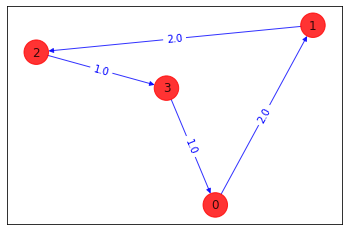

In [46]:
# Brute Force ratkaisu
from itertools import permutations

def brute_force_tsp(w, N):
    a=list(permutations(range(1,N)))
    last_best_distance = 1e10
    for i in a:
        distance = 0
        pre_j = 0
        for j in i:
            distance = distance + w[j,pre_j]
            pre_j = j
        distance = distance + w[pre_j,0]
        order = (0,) + i
        if distance < last_best_distance:
            best_order = order
            last_best_distance = distance
            print('order = ' + str(order) + ' Distance = ' + str(distance))
    return last_best_distance, best_order

best_distance, best_order = brute_force_tsp(ins.w, ins.dim)
print('Best order from brute force = ' + str(best_order) + ' with total distance = ' + str(best_distance))

def draw_tsp_solution(G, order, colors, pos):
    G2 = nx.DiGraph()
    G2.add_nodes_from(G)
    n = len(order)
    for i in range(n):
        j = (i + 1) % n
        G2.add_edge(order[i], order[j], weight=G[order[i]][order[j]]['weight'])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G2, node_color=colors, edge_color='b', node_size=600, alpha=.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G2, 'weight')
    nx.draw_networkx_edge_labels(G2, pos, font_color='b', edge_labels=edge_labels)

draw_tsp_solution(G, best_order, colors, pos)

In [47]:
qubitOp, offset = tsp.get_operator(ins)
print('Offset:', offset)
print('Ising Hamiltonian:')
print(qubitOp.print_details())

Offset: 1600018.0
Ising Hamiltonian:
IIIIIIIIIIIIIIIZ	(-200002.5+0j)
IIIIIIIIIIZIIIII	(-200002.5+0j)
IIIIIIIIIIZIIIIZ	(0.5+0j)
IIIIIIIIIIIIIIZI	(-200002.5+0j)
IIIIIIIIIZIIIIII	(-200002.5+0j)
IIIIIIIIIZIIIIZI	(0.5+0j)
IIIIIIIIIIIIIZII	(-200002.5+0j)
IIIIIIIIZIIIIIII	(-200002.5+0j)
IIIIIIIIZIIIIZII	(0.5+0j)
IIIIIIIIIIIIZIII	(-200002.5+0j)
IIIIIIIIIIIZIIII	(-200002.5+0j)
IIIIIIIIIIIZZIII	(0.5+0j)
IIIIIIZIIIIIIIII	(-200002.5+0j)
IIIIIIZIIIIIIIIZ	(0.5+0j)
IIIIIZIIIIIIIIII	(-200002.5+0j)
IIIIIZIIIIIIIIZI	(0.5+0j)
IIIIZIIIIIIIIIII	(-200002.5+0j)
IIIIZIIIIIIIIZII	(0.5+0j)
IIIIIIIZIIIIIIII	(-200002.5+0j)
IIIIIIIZIIIIZIII	(0.5+0j)
IIZIIIIIIIIIIIII	(-200001.5+0j)
IIZIIIIIIIIIIIIZ	(0.25+0j)
IZIIIIIIIIIIIIII	(-200001.5+0j)
IZIIIIIIIIIIIIZI	(0.25+0j)
ZIIIIIIIIIIIIIII	(-200001.5+0j)
ZIIIIIIIIIIIIZII	(0.25+0j)
IIIZIIIIIIIIIIII	(-200001.5+0j)
IIIZIIIIIIIIZIII	(0.25+0j)
IIIIIIIIIIIZIIZI	(0.5+0j)
IIIIIIIIIIZIIZII	(0.5+0j)
IIIIIIIIIZIIZIII	(0.5+0j)
IIIIIIIIZIIIIIIZ	(0.5+0j)
IIIIIIZIIIIZIIII	(0.5+0j)
IIIII

In [48]:
qp = QuadraticProgram()
qp.from_ising(qubitOp, offset, linear=True)
qp.to_docplex().prettyprint()

// This file has been generated by DOcplex
// model name is: AnonymousModel
// single vars section
dvar bool x_0;
dvar bool x_1;
dvar bool x_2;
dvar bool x_3;
dvar bool x_4;
dvar bool x_5;
dvar bool x_6;
dvar bool x_7;
dvar bool x_8;
dvar bool x_9;
dvar bool x_10;
dvar bool x_11;
dvar bool x_12;
dvar bool x_13;
dvar bool x_14;
dvar bool x_15;

minimize
 - 200000 x_0 - 200000 x_1 - 200000 x_2 - 200000 x_3 - 200000 x_4 - 200000 x_5
 - 200000 x_6 - 200000 x_7 - 200000 x_8 - 200000 x_9 - 200000 x_10
 - 200000 x_11 - 200000 x_12 - 200000 x_13 - 200000 x_14 - 200000 x_15 [
 200000 x_0*x_1 + 200000 x_0*x_2 + 200000 x_0*x_3 + 200000 x_0*x_4 + 2 x_0*x_5
 + 2 x_0*x_7 + 200000 x_0*x_8 + 2 x_0*x_9 + 2 x_0*x_11 + 200000 x_0*x_12
 + x_0*x_13 + x_0*x_15 + 200000 x_1*x_2 + 200000 x_1*x_3 + 2 x_1*x_4
 + 200000 x_1*x_5 + 2 x_1*x_6 + 2 x_1*x_8 + 200000 x_1*x_9 + 2 x_1*x_10
 + x_1*x_12 + 200000 x_1*x_13 + x_1*x_14 + 200000 x_2*x_3 + 2 x_2*x_5
 + 200000 x_2*x_6 + 2 x_2*x_7 + 2 x_2*x_9 + 200000 x_2*x_10 + 2

In [5]:
# Create a random TSP Hamiltonian
from qiskit.aqua.algorithms import QAOA
qubitOp, offset = tsp.get_operator(ins)
qp = QuadraticProgram()
qp.from_ising(qubitOp, offset, linear=True)

aqua_globals.random_seed = 10598
quantum_instance = QuantumInstance(Aer.get_backend('qasm_simulator'),
                                   seed_simulator=aqua_globals.random_seed,
                                   seed_transpiler=aqua_globals.random_seed)
qaoa_mes = QAOA(quantum_instance=quantum_instance, initial_point=[0, 0])
exact_mes = NumPyMinimumEigensolver()

# solving Quadratic Program using exact classical eigensolver
exact = MinimumEigenOptimizer(exact_mes)
exact_result = exact.solve(qp)
print("\nExact:\n", exact_result)


Exact:
 optimal function value: 6.0
optimal value: [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
status: SUCCESS


In [6]:
t=np.zeros((n,n))
for i in range(n):
    for j in range(n):
        t[i,j] = exact_result[j+n*i]
print(t)

opt_coordinates =t@coordinates
print(opt_coordinates)


opt_distances =np.zeros((n,n))



for i in range(n):
    for j in range(n):
        opt_distances[i,j] =round(math.sqrt((opt_coordinates[i, 0]-opt_coordinates[j,0])**2+(opt_coordinates[i,1]-opt_coordinates[j,1])**2),0)
print("tulostetaan opt_distances:")
print(opt_distances)

pos = {k: v for k,v in enumerate(opt_coordinates)}

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[1.7 2.5]
 [2.8 0.8]
 [2.5 2.1]
 [3.4 2.8]]
tulostetaan opt_distances:
[[0. 2. 1. 2.]
 [2. 0. 1. 2.]
 [1. 1. 0. 1.]
 [2. 2. 1. 0.]]


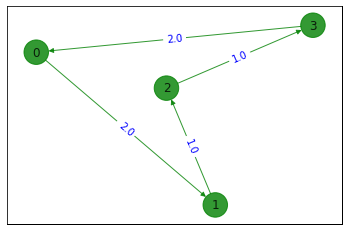

In [7]:
G = nx.Graph()
G.add_nodes_from(np.arange(0, ins.dim, 1))
colors = ['g' for node in G.nodes()]
draw_graph(G, colors, pos)
G2 = nx.DiGraph()
G2.add_nodes_from(G)



for i in range(n):
    j = (i + 1) % n
    G2.add_edge(i, j, weight=opt_distances[i,j])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G2, node_color=colors, edge_color='g', node_size=600, alpha=.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G2, 'weight')
    nx.draw_networkx_edge_labels(G2, pos, font_color='b', edge_labels=edge_labels)

In [8]:
# solving the Problem using QAOA
qaoa = MinimumEigenOptimizer(qaoa_mes) 
qaoa_result = qaoa.solve(qp)
print("\nQAOA:\n", qaoa_result)

c:\users\matti\miniconda3\envs\quantum_win\lib\site-packages\qiskit\aqua\components\variational_forms\variational_form.py:48: DeprecationWarning: The package qiskit.aqua.components.variational_forms is deprecated. For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_package('aqua.components.variational_forms')



QAOA:
 optimal function value: 6.0
optimal value: [0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
status: SUCCESS


In [9]:
t=np.zeros((n,n))
for i in range(n):
    for j in range(n):
        t[i,j] =qaoa_result[j+n*i]
print(t)

opt_coordinates =t@coordinates
print(opt_coordinates)

opt_distances =np.zeros((n,n))

for i in range(n):
    for j in range(n):
        opt_distances[i,j] =round(math.sqrt((opt_coordinates[i, 0]-opt_coordinates[j,0])**2+(opt_coordinates[i,1]-opt_coordinates[j,1])**2),0)
print("tulostetaan opt_distances:")
print(opt_distances)

pos = {k: v for k,v in enumerate(opt_coordinates)}

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[2.5 2.1]
 [1.7 2.5]
 [2.8 0.8]
 [3.4 2.8]]
tulostetaan opt_distances:
[[0. 1. 1. 1.]
 [1. 0. 2. 2.]
 [1. 2. 0. 2.]
 [1. 2. 2. 0.]]


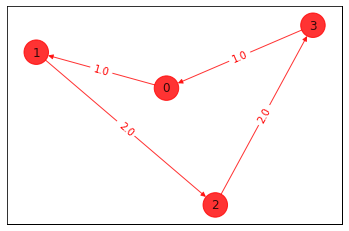

In [11]:
G = nx.Graph()
G.add_nodes_from(np.arange(0, ins.dim, 1))
colors = ['r' for node in G.nodes()]
draw_graph(G, colors, pos)
G3 = nx.DiGraph()
G3.add_nodes_from(G)

'''
t=np.zeros((n,n))
for i in range(n):
    for j in range(n):
        t[i,j] = qaoa_result[j+n*i]

weigths = t@distances
print(weigths)

'''
for i in range(n):
    j = (i + 1) % n
    G3.add_edge(i, j, weight=opt_distances[i][j])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G3, node_color=colors, edge_color='r', node_size=600, alpha=.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G3, 'weight')
    nx.draw_networkx_edge_labels(G3, pos, font_color='r', edge_labels=edge_labels)

In [109]:
# Testailua
t = np.zeros((2, 3))

In [81]:
t[1, 2] = 1

In [82]:
t

array([[0., 0., 0.],
       [0., 0., 1.]])

In [98]:
t[0][1]=2

In [99]:
print(t)

[[0. 2. 0.]
 [0. 0. 1.]]


In [112]:
s= np.zeros((5,5))
print(s)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [114]:
s[3,4]=1